# Utility Functions

In [122]:
import numpy as np
from decimal import Decimal, getcontext
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from collections import defaultdict

getcontext().prec = 1000

def sum_with_error(eigs, r, k, eps):
    sums = [Decimal('1.0')]
    N = np.floor((k/eps)**2)
    full_traces = [Decimal('1.0')]
    for i in range(1, r+1):
      temp = Decimal('0.0')
      for j in range(len(eigs)):
        temp += eigs[j] ** Decimal(i)
      full_traces.append(temp)
    for i in range(1, r+1):
        estimated_val = sum(np.random.binomial(N, full_traces[i], 1))/N
        sums.append(Decimal(estimated_val))
    return sums


def cal_coefficient(sums, r):
    a = [Decimal(1.0), sums[1]]
    for i in range(2, r + 1):
        v = Decimal(0.0)
        for j in range(1, i + 1):
            if j%2 == 0:
              v -= a[i - j] * sums[j]
            else:
              v += a[i - j] * sums[j]
        a.append(v / Decimal(i))
    return a


def cal_power_trace(sums, eigen_values, a, K, r):
    v1 = Decimal(0.0)
    for i in range(1, K + 1):
        tmp = Decimal(0.0)
        for j in range(1, r + 1):
            if j%2 == 0:
              tmp -= sums[r - j + i] * a[j]
            else:
              tmp += sums[r - j + i] * a[j]
        v1 = tmp
        sums.append(tmp)
    v2 = sum(lam**(r + K) for lam in eigen_values)
    return v1, v2


def gen_arithmetic(max_min_gap, size):
    """
    Generate an eigenvalue vector in arithmetic progression (size = 'size'),
    where (max_value - min_value) = max_min_gap.
    If it's not possible to construct such a distribution, return None.

    Example:
    --------
    gen_arithmetic(0, 4) -> [0.25, 0.25, 0.25, 0.25]
    gen_arithmetic(0.5, 4) -> might look like [0.5, 0.3333, 0.1667, 0.0], scaled to sum=1
    """
    if max_min_gap > 2 / size or max_min_gap > 2 - 2 / size:
        print("[gen_arithmetic] Error: Cannot satisfy the given max_min_gap.")
        return None
    eigs = np.linspace(1/size + max_min_gap/2, 1/size - max_min_gap/2, size)
    s = np.sum(eigs)
    if s == 0:
        return None
    eigs /= s
    eigs = [Decimal(str(eig)) for eig in eigs]

    # Plotting the eigenvalues with improved aesthetics
    plt.figure(figsize=(8, 3))
    colors = ['royalblue' for i in range(len(eigs))]  # Strong blue for the largest, softer for others
    bars = plt.bar(range(len(eigs)), eigs, color=colors, alpha=0.8, edgecolor='black')
    
    # Annotate max and min values
    plt.text(0, eigs[0], f'{eigs[0]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(8, eigs[8], f'{eigs[8]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(len(eigs)-1, eigs[-1], f'{eigs[-1]:.3f}', ha='center', va='bottom', fontsize=12)
    
    # plt.yscale('log')  # Log scale to better visualize small values
    plt.xlim(-1, 16)  # Set x-axis range
    plt.ylim(0, 0.14)  # Set x-axis range
    plt.xticks([])  # Remove x-axis labels
    plt.xlabel("Index", fontsize=16)
    plt.ylabel("Eigenvalue", fontsize=16)
    # plt.title("Arithmetic Eigenvalues - Distribution", size=16)
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("result/arith_dist.png", bbox_inches="tight", dpi=300)
    plt.show()

    return eigs

def gen_arithmetic_2(max_min_gap, size):
    """
    Generate an eigenvalue vector in arithmetic progression (size = 'size'),
    where (max_value - min_value) = max_min_gap.
    If it's not possible to construct such a distribution, return None.

    Example:
    --------
    gen_arithmetic(0, 4) -> [0.25, 0.25, 0.25, 0.25]
    gen_arithmetic(0.5, 4) -> might look like [0.5, 0.3333, 0.1667, 0.0], scaled to sum=1
    """
    if max_min_gap > 2 / size or max_min_gap > 2 - 2 / size:
        print("[gen_arithmetic] Error: Cannot satisfy the given max_min_gap.")
        return None
    eigs = np.linspace(1/size + max_min_gap/2, 1/size - max_min_gap/2, size)
    s = np.sum(eigs)
    if s == 0:
        return None
    eigs /= s
    eigs = [Decimal(str(eig)) for eig in eigs]

    # Plotting the eigenvalues with improved aesthetics
    plt.figure(figsize=(8, 3))
    colors = ['royalblue' for i in range(len(eigs))]  # Strong blue for the largest, softer for others
    bars = plt.bar(range(len(eigs)), eigs, color=colors, alpha=0.8, edgecolor='black')
    
    # Annotate max and min values
    plt.text(0, eigs[0], f'{eigs[0]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(8, eigs[8], f'{eigs[8]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(len(eigs)-1, eigs[-1], f'{eigs[-1]:.3f}', ha='center', va='bottom', fontsize=12)
    
    # plt.yscale('log')  # Log scale to better visualize small values
    plt.xlim(-1, 16)  # Set x-axis range
    plt.ylim(0, 0.08)  # Set x-axis range
    plt.xticks([])  # Remove x-axis labels
    plt.xlabel("Index", fontsize=16)
    plt.ylabel("Eigenvalue", fontsize=16)
    # plt.title("Identical Eigenvalues - Distribution", size=16)
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("result/id_dist.png", bbox_inches="tight", dpi=300)
    plt.show()

    return eigs

def gen_geometric(max_min_ratio, size):
    """
    Generate an eigenvalue vector in geometric progression (size = 'size'),
    where (max_value / min_value) = max_min_ratio.
    If it's not possible, return None.

    Example:
    --------
    gen_geometric(2, 4) -> might look like [0.4, 0.2667, 0.2, 0.1333], scaled to sum=1
    """
    if max_min_ratio <= 1:
        print("[gen_geometric] Error: max_min_ratio must be > 1.")
        return None
    r = max_min_ratio ** (1 / (1 - size))
    numerator = (1 - r)
    denominator = (1 - r**size)
    if denominator == 0:
        return None
    a_1 = numerator / denominator
    a_size = numerator * (r**(size - 1)) / denominator
    eigs = np.geomspace(a_1, a_size, num=size)
    s = np.sum(eigs)
    if s == 0:
        return None
    eigs /= s
    eigs = [Decimal(str(eig)) for eig in eigs]
    
    # Plotting the eigenvalues with improved aesthetics
    plt.figure(figsize=(8, 3))
    colors = ['royalblue' for i in range(len(eigs))]  # Strong blue for the largest, softer for others
    bars = plt.bar(range(len(eigs)), eigs, color=colors, alpha=0.8, edgecolor='black')
    
    # Annotate max and min values
    plt.text(0, eigs[0], f'{eigs[0]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(8, eigs[8], f'{eigs[8]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(len(eigs)-1, eigs[-1], f'{eigs[-1]:.3f}', ha='center', va='bottom', fontsize=12)
    
    plt.yscale('log')  # Log scale to better visualize small values
    plt.xlim(-1, 16)  # Set x-axis range
    plt.ylim(0, 1.5)  # Set x-axis range
    plt.xticks([])  # Remove x-axis labels
    plt.xlabel("Index", fontsize=16)
    plt.ylabel("Eigenvalue (log scale)", fontsize=16)
    # plt.title("Geometric Eigenvalues - Distribution", size=16)
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("result/geo_dist.png", bbox_inches="tight", dpi=300)
    plt.show()
    return eigs


def gen_almost_one(max_eigenvalue, size):
    """
    Generate an eigenvalue distribution of length `size` where:
      - One eigenvalue is chosen in the range [0.999, 0.999999].
      - The rest (size-1) eigenvalues share 1 - that large value randomly.
    Returns:
      A NumPy array of shape (size,) that sums to 1.
    """
    if size < 2:
        raise ValueError("size must be at least 2 for gen_almost_one")
    big_val = np.random.uniform(
        0.99, 0.9999) if max_eigenvalue is not None else max_eigenvalue
    remain = 1.0 - big_val
    other = np.random.rand(size - 1)
    other_sum = np.sum(other)
    if other_sum > 0:
        other = other / other_sum * remain
    else:
        other = np.zeros(size - 1)
    eigs = np.concatenate(([big_val], other))
    eigs = np.sort(eigs)[::-1]
    eigs = [Decimal(str(eig)) for eig in eigs]

    # Plotting the eigenvalues with improved aesthetics
    plt.figure(figsize=(8, 3))
    colors = ['royalblue' if i == 0 else '#1E90FF' for i in range(len(eigs))]  # Strong blue for the largest, softer for others
    bars = plt.bar(range(len(eigs)), eigs, color=colors, alpha=0.8, edgecolor='black')
    
    # Annotate max and min values
    plt.text(0, eigs[0], f'{eigs[0]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(8, eigs[8], f'{eigs[8]:.3f}', ha='center', va='bottom', fontsize=12)
    plt.text(len(eigs)-1, eigs[-1], f'{eigs[-1]:.3f}', ha='center', va='bottom', fontsize=12)
    
    plt.yscale('log')  # Log scale to better visualize small values
    plt.xlim(-1, 16)  # Set x-axis range
    plt.ylim(0, 3)  # Set x-axis range
    plt.xticks([])  # Remove x-axis labels
    plt.xlabel("Index", fontsize=16)
    plt.ylabel("Eigenvalue (log scale)", fontsize=16)
    # plt.title("One Dominant Eigenvalue - Distribution", size=16)
    plt.tick_params(axis='both', labelsize=15.5)  # X, Y축 숫자 크기
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("result/dominant_dist.png", bbox_inches="tight", dpi=300)
    plt.show()
    
    return eigs

# Almost_one

/var/folders/jc/vf7pghtx219546090g5_j7lh0000gn/T/ipykernel_47791/2577297686.py:230: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 3)  # Set x-axis range


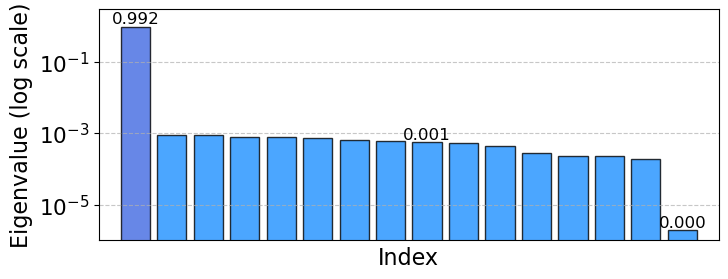

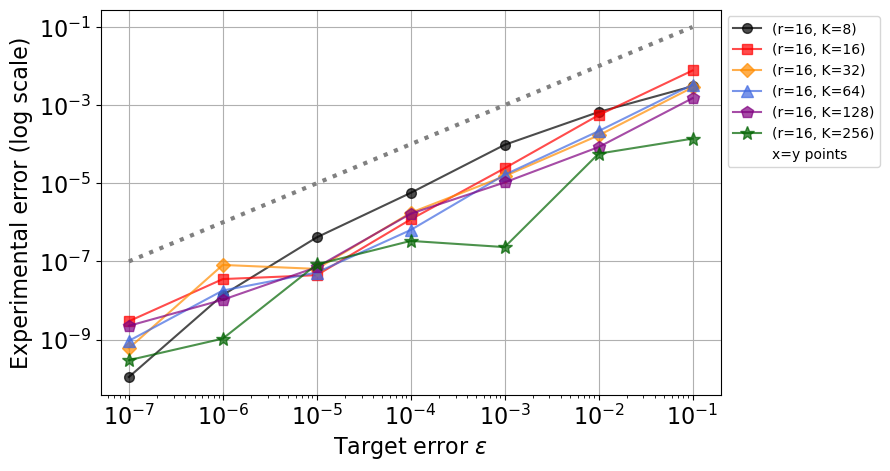

In [129]:
def experiment_almost_one_A(r_vals, k_vals, eps_vals, max_eig=0.999, trials=1):
    results = []
    index_count = 0

    for r in r_vals:
        eigs = gen_almost_one(max_eig, r)

        for k in k_vals:
            for eps in eps_vals:
                abs_errs = []
                for _ in range(trials):
                    tilde_r = min(r, math.ceil(math.log(k / eps)/math.log(math.log(k / eps))))
                    # print(r, tilde_r, k, eps)
                    sums = sum_with_error(eigs, tilde_r, k, eps)
                    a = cal_coefficient(sums, tilde_r)
                    v1, v2 = cal_power_trace(sums, eigs, a, k, tilde_r)
                    abs_err = abs(v1 - v2)
                    abs_errs.append(abs_err)

                mean_err = np.mean(abs_errs)
                row = {
                    "index": index_count,
                    "r": r,
                    "K": k,
                    "eps": eps,
                    "mean_error": mean_err
                }
                results.append(row)
                index_count += 1

    return results


def main_A():
    r_vals = [16]
    k_vals = [8, 16, 32, 64, 128, 256]
    eps_vals = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    max_eig = 0.99
    trials = 1
    data = experiment_almost_one_A(r_vals, k_vals, eps_vals, max_eig=max_eig, trials=trials)

    data_map = defaultdict(list)
    for row in data:
        r_ = row["r"]
        K_ = row["K"]
        eps_ = row["eps"]
        err_ = row["mean_error"]
        data_map[(r_, K_)].append((eps_, err_))

    style_map = {
        (16, 8): dict(linestyle='-', marker='o', color='black', markersize=7, linewidth=1.5),
        (16, 16): dict(linestyle='-', marker='s', color='red', markersize=7, linewidth=1.5),
        (16, 32): dict(linestyle='-', marker='D', color='darkorange', markersize=7, linewidth=1.5),
        (16, 64): dict(linestyle='-', marker='^', color='royalblue', markersize=8, linewidth=1.5),
        (16, 128): dict(linestyle='-', marker='p', color='purple', markersize=9, linewidth=1.5),
        (16, 256): dict(linestyle='-', marker='*', color='darkgreen', markersize=10, linewidth=1.5)
    }

    for key in style_map:
        style_map[key]["alpha"] = 0.7  # 0.0 (완전 투명) ~ 1.0 (완전 불투명)

    plt.figure(figsize=(8, 5))
    for (r_, K_) in data_map:
        arr = sorted(data_map[(r_, K_)], key=lambda x: x[0])  # eps 순 정렬
        xs = [p[0] for p in arr]  # eps
        ys = [p[1] for p in arr]  # mean_err

        plot_style = style_map.get((r_, K_), dict(
            linestyle='-', marker='o', color='black'))
        label_str = f"(r={r_}, K={K_})"
        plt.plot(xs, ys, label=label_str, **plot_style)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Target error $\epsilon$", fontsize=16)  # X축 제목 글씨 크기 증가
    plt.ylabel("Experimental error (log scale)", fontsize=16)  # Y축 제목 글씨 크기 증가
    # plt.title("One Dominant Eigenvalue - Experiment 1", size=16)
    # plt.title(f"Almost One, max_eig={max_eig}", fontsize=16)  # 제목 글씨 크기 증가
    # plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)

    # Add x=y reference points with dotted line
    eps_vals = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    plt.scatter(eps_vals, eps_vals, color='red', marker='None', label='x=y points')
    plt.plot(eps_vals, eps_vals, linestyle='dotted', color='gray', alpha=1, linewidth=3)
    # plt.legend()

    # 축 숫자 크기 증가
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig("result/dominant_exp1.png", bbox_inches="tight", dpi=300)
    plt.show()


if __name__ == "__main__":
    main_A()


# Geo


/var/folders/jc/vf7pghtx219546090g5_j7lh0000gn/T/ipykernel_47791/703460327.py:183: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.5)  # Set x-axis range


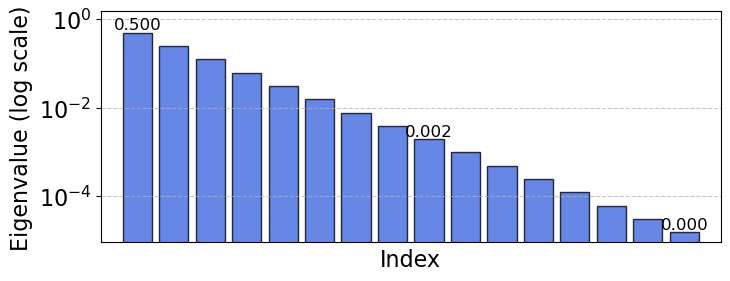

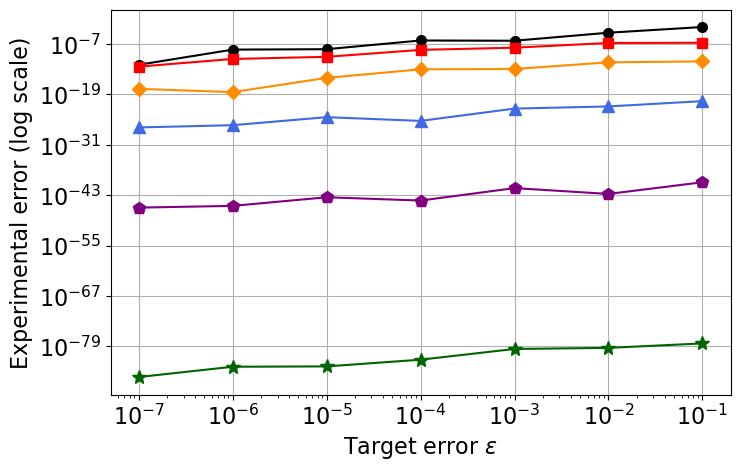

In [120]:
def experiment_geometric_A(r_vals, k_vals, eps_vals, gap=0.25, trials=10):
    results = []
    index_count = 0

    for r in r_vals:
        eigs = gen_geometric(gap, r)
        if eigs is None:
            continue

        for k in k_vals:
            for eps in eps_vals:
                abs_errs = []
                for _ in range(trials):
                    # tilde_r = math.ceil(math.log(k / eps))
                    tilde_r = min(r, math.ceil(math.log(k / eps) / math.log(math.log(k / eps))))
                    sums = sum_with_error(eigs, tilde_r, k, eps)
                    a = cal_coefficient(sums, tilde_r)
                    v1, v2 = cal_power_trace(sums, eigs, a, k, tilde_r)
                    abs_err = abs(v1 - v2)
                    abs_errs.append(abs_err)

                mean_err = np.mean(abs_errs)
                row = {
                    "index": index_count,
                    "r": r,
                    "K": k,
                    "eps": eps,
                    "mean_error": mean_err
                }
                results.append(row)
                index_count += 1

    return results

def main_A():
    r_vals = [16]
    k_vals = [8, 16, 32, 64, 128, 256]
    eps_vals = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    gap = 2 ** 15
    trials = 1

    data = experiment_geometric_A(
        r_vals, k_vals, eps_vals, gap=gap, trials=trials)

    data_map = defaultdict(list)
    for row in data:
        r_ = row["r"]
        K_ = row["K"]
        eps_ = row["eps"]
        err_ = row["mean_error"]
        data_map[(r_, K_)].append((eps_, err_))

    style_map = {
        (16, 8): dict(linestyle='-', marker='o', color='black', markersize=7, linewidth=1.5),
        (16, 16): dict(linestyle='-', marker='s', color='red', markersize=7, linewidth=1.5),
        (16, 32): dict(linestyle='-', marker='D', color='darkorange', markersize=7, linewidth=1.5),
        (16, 64): dict(linestyle='-', marker='^', color='royalblue', markersize=8, linewidth=1.5),
        (16, 128): dict(linestyle='-', marker='p', color='purple', markersize=9, linewidth=1.5),
        (16, 256): dict(linestyle='-', marker='*', color='darkgreen', markersize=10, linewidth=1.5)
    }

    plt.figure(figsize=(8, 5))
    for (r_, K_) in data_map:
        arr = sorted(data_map[(r_, K_)], key=lambda x: x[0])  # sort by eps
        xs = [p[0] for p in arr]  # eps
        ys = [p[1] for p in arr]  # mean_error

        plot_style = style_map.get((r_, K_), dict(
            linestyle='-', marker='o', color='black'))
        label_str = f"(r={r_}, K={K_})"
        plt.plot(xs, ys, label=label_str, **plot_style)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Target error $\epsilon$", fontsize=16)  # X축 제목 글씨 크기 증가
    plt.ylabel("Experimental error (log scale)", fontsize=16)  # Y축 제목 글씨 크기 증가
    # plt.title("Geometric Eigenvalues - Experiment 1", size=16)
    # plt.title(f"Almost One, max_eig={max_eig}", fontsize=16)  # 제목 글씨 크기 증가
    # plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)

    # 축 숫자 크기 증가
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.savefig("result/geo_exp1.png", bbox_inches="tight", dpi=300)
    plt.show()

if __name__ == "__main__":
    main_A()

# Arith

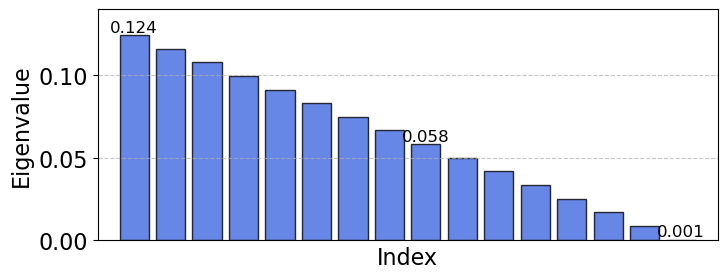

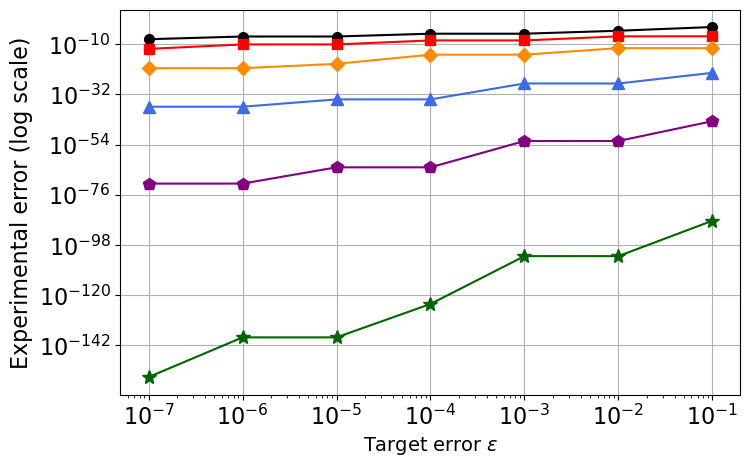

In [126]:
def experiment_arithmetic_A(r_vals, k_vals, eps_vals, gap=0.25, trials=10):
    results = []  # list of dict rows
    index_count = 0

    for r in r_vals:
        eigs = gen_arithmetic(gap, r)
        if eigs is None:
            continue

        for k in k_vals:
            for eps in eps_vals:
                abs_errs = []
                for _ in range(trials):
                    # tilde_r = math.ceil(math.log(k / eps))
                    tilde_r = min(r,math.ceil(math.log(k / eps) / math.log(math.log(k / eps))))
                    sums = sum_with_error(eigs, tilde_r, k, eps)
                    a = cal_coefficient(sums, tilde_r)
                    v1, v2 = cal_power_trace(sums, eigs, a, k, tilde_r)
                    abs_err = abs(v1 - v2)
                    abs_errs.append(abs_err)

                mean_err = np.mean(abs_errs)
                row = {
                    "index": index_count,
                    "r": r,
                    "K": k,
                    "eps": eps,
                    "mean_error": mean_err
                }
                results.append(row)
                index_count += 1

    return results


def main_A():
    r_vals = [16]
    k_vals = [8, 16, 64, 32, 128, 256]
    eps_vals = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    gap = 0.124
    trials = 1  # or more if needed

    data = experiment_arithmetic_A(
        r_vals, k_vals, eps_vals, gap=gap, trials=trials)
    
    data_map = defaultdict(list)
    for row in data:
        r_ = row["r"]
        K_ = row["K"]
        eps_ = row["eps"]
        err_ = row["mean_error"]
        data_map[(r_, K_)].append((eps_, err_))

    style_map = {
        (16, 8): dict(linestyle='-', marker='o', color='black', markersize=7, linewidth=1.5),
        (16, 16): dict(linestyle='-', marker='s', color='red', markersize=7, linewidth=1.5),
        (16, 32): dict(linestyle='-', marker='D', color='darkorange', markersize=7, linewidth=1.5),
        (16, 64): dict(linestyle='-', marker='^', color='royalblue', markersize=8, linewidth=1.5),
        (16, 128): dict(linestyle='-', marker='p', color='purple', markersize=9, linewidth=1.5),
        (16, 256): dict(linestyle='-', marker='*', color='darkgreen', markersize=10, linewidth=1.5)
    }

    # 6) Plot
    plt.figure(figsize=(8, 5))

    # sort eps for each line
    for (r_, K_) in data_map:
        arr = sorted(data_map[(r_, K_)], key=lambda x: x[0])  # sort by eps
        xs = [p[0] for p in arr]
        ys = [p[1] for p in arr]

        # Lookup style
        plot_style = style_map.get((r_, K_), dict(
            linestyle='-', marker='o', color='black'))
        label_str = f"(r={r_}, K={K_})"

        # plot with style
        plt.plot(xs, ys, label=label_str, **plot_style)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Target error $\epsilon$", fontsize=14)  # X축 제목 글씨 크기 증가
    plt.ylabel("Experimental error (log scale)", fontsize=16)  # Y축 제목 글씨 크기 증가
    # plt.title("Arithmetic Eigenvalues - Experiment 1", size=16)
    # plt.title(f"Almost One, max_eig={max_eig}", fontsize=16)  # 제목 글씨 크기 증가
    # plt.legend(loc="upper left", fontsize=16)
    plt.grid(True)

    # 축 숫자 크기 증가
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.savefig("result/arith_exp1.png", bbox_inches="tight", dpi=300)
    plt.show()


if __name__ == "__main__":
    main_A()

# Same

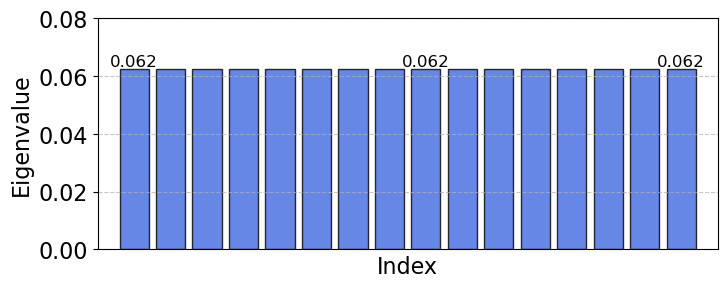

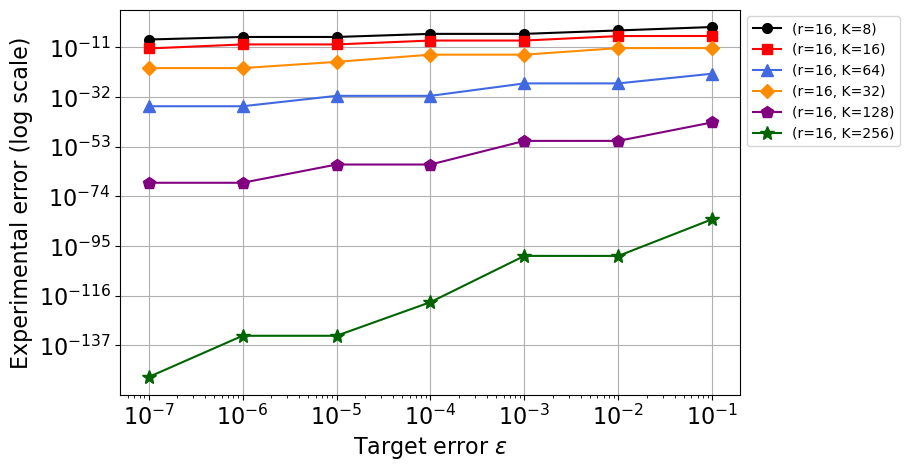

In [127]:
def experiment_arithmetic_A(r_vals, k_vals, eps_vals, gap=0.25, trials=10):
    results = []  # list of dict rows
    index_count = 0

    for r in r_vals:
        eigs = gen_arithmetic_2(gap, r)
        if eigs is None:
            continue

        for k in k_vals:
            for eps in eps_vals:
                abs_errs = []
                for _ in range(trials):
                    # tilde_r = math.ceil(math.log(k / eps))
                    tilde_r = min(r,math.ceil(math.log(k / eps) / math.log(math.log(k / eps))))
                    sums = sum_with_error(eigs, tilde_r, k, eps)
                    a = cal_coefficient(sums, tilde_r)
                    v1, v2 = cal_power_trace(sums, eigs, a, k, tilde_r)
                    abs_err = abs(v1 - v2)
                    abs_errs.append(abs_err)

                mean_err = np.mean(abs_errs)
                row = {
                    "index": index_count,
                    "r": r,
                    "K": k,
                    "eps": eps,
                    "mean_error": mean_err
                }
                results.append(row)
                index_count += 1

    return results


def main_A():
    r_vals = [16]
    k_vals = [8, 16, 64, 32, 128, 256]
    eps_vals = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    gap = 0
    trials = 1  # or more if needed

    data = experiment_arithmetic_A(
        r_vals, k_vals, eps_vals, gap=gap, trials=trials)
    
    data_map = defaultdict(list)
    for row in data:
        r_ = row["r"]
        K_ = row["K"]
        eps_ = row["eps"]
        err_ = row["mean_error"]
        data_map[(r_, K_)].append((eps_, err_))

    style_map = {
        (16, 8): dict(linestyle='-', marker='o', color='black', markersize=7, linewidth=1.5),
        (16, 16): dict(linestyle='-', marker='s', color='red', markersize=7, linewidth=1.5),
        (16, 32): dict(linestyle='-', marker='D', color='darkorange', markersize=7, linewidth=1.5),
        (16, 64): dict(linestyle='-', marker='^', color='royalblue', markersize=8, linewidth=1.5),
        (16, 128): dict(linestyle='-', marker='p', color='purple', markersize=9, linewidth=1.5),
        (16, 256): dict(linestyle='-', marker='*', color='darkgreen', markersize=10, linewidth=1.5)
    }

    # 6) Plot
    plt.figure(figsize=(8, 5))

    # sort eps for each line
    for (r_, K_) in data_map:
        arr = sorted(data_map[(r_, K_)], key=lambda x: x[0])  # sort by eps
        xs = [p[0] for p in arr]
        ys = [p[1] for p in arr]

        # Lookup style
        plot_style = style_map.get((r_, K_), dict(
            linestyle='-', marker='o', color='black'))
        label_str = f"(r={r_}, K={K_})"

        # plot with style
        plt.plot(xs, ys, label=label_str, **plot_style)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Target error $\epsilon$", fontsize=16)  # X축 제목 글씨 크기 증가
    plt.ylabel("Experimental error (log scale)", fontsize=16)  # Y축 제목 글씨 크기 증가
    # plt.title("Identical Eigenvalues - Experiment 1", size=16)
    # plt.title(f"Almost One, max_eig={max_eig}", fontsize=16)  # 제목 글씨 크기 증가
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)

    # 축 숫자 크기 증가
    plt.tick_params(axis='both', labelsize=16)  # X, Y축 숫자 크기
    plt.savefig("result/id_exp1.png", bbox_inches="tight", dpi=300)
    plt.show()


if __name__ == "__main__":
    main_A()